In [1]:
import sys
import pandas as pd
sys.path.append('Model_Output')  # Add the directory containing your .py file to the system path
from output import ModelOutput  # Import your class from the .py file
from diagnostics import GenerationMixAnalyzer
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # For UserWarnings like CRS or centroid
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)  # For pandas SettingWithCopyWarning


In [2]:
# Instantiate the class
emission_capacity = ModelOutput()
# Load data (assuming this is a method inside your class)
emission_capacity.load_data()
emission_capacity.generation_county()

In [3]:
# Now, you can call the ask_emission_criteria() to ask the user for input
emission_capacity.ask_emission_criteria()

Exported data to All_PLCO2RTA_total_emissions_export.csv
Map saved as 'All_CO2_total_emissions_map.html'.
Data has been exported to 'All_CO2_total_emissions_export.csv'.


In [4]:
# Generate the maps or other operations using methods
emission_capacity.create_capacity_map(save_as_html=True, html_filename='capacity_map.html')

In [5]:
analysis = GenerationMixAnalyzer()
analysis.load_data()
hourly_mix = analysis.get_hourly_gen_mix()
annual_mix = analysis.get_annual_gen_mix()

Total sum of fuel mix capacities: 35162579.49035279


In [6]:
analysis.compare_annual_mix_to_baseline(annual_mix)

                        Resource Percentage_Baseline Percentage_Model
0                           Coal             21.900%          24.229%
1                            Oil              0.600%           3.319%
2                            Gas             38.400%          30.254%
3                   Other Fossil              0.500%           0.000%
4                        Nuclear             18.900%          18.413%
5                          Hydro              6.000%           7.299%
6                        Biomass              1.300%           0.601%
7                           Wind              9.200%          13.282%
8                          Solar              2.800%           2.026%
9                     Geothermal              0.400%           0.576%
10  Other unknown/purchased fuel              0.100%           0.000%


/Users/haniftayarani/good_model/Model_Output/diagnostics.py:111: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  hourly_df = hourly_df.groupby(level=0, axis=1).sum()


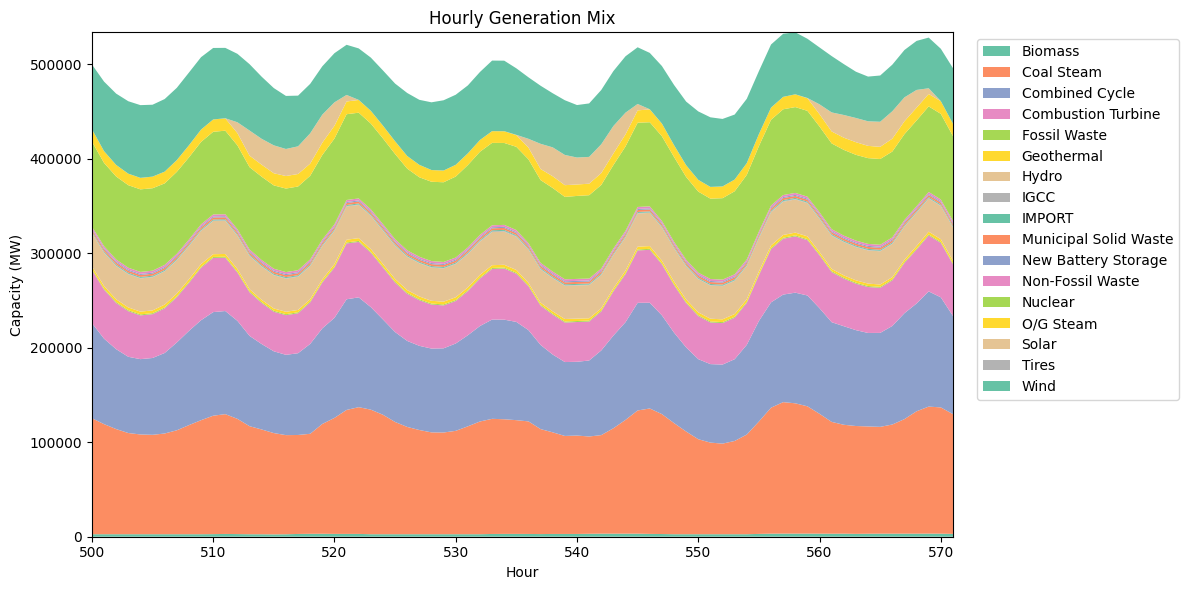

In [7]:
analysis.plot_hourly_gen_mix(hourly_mix)

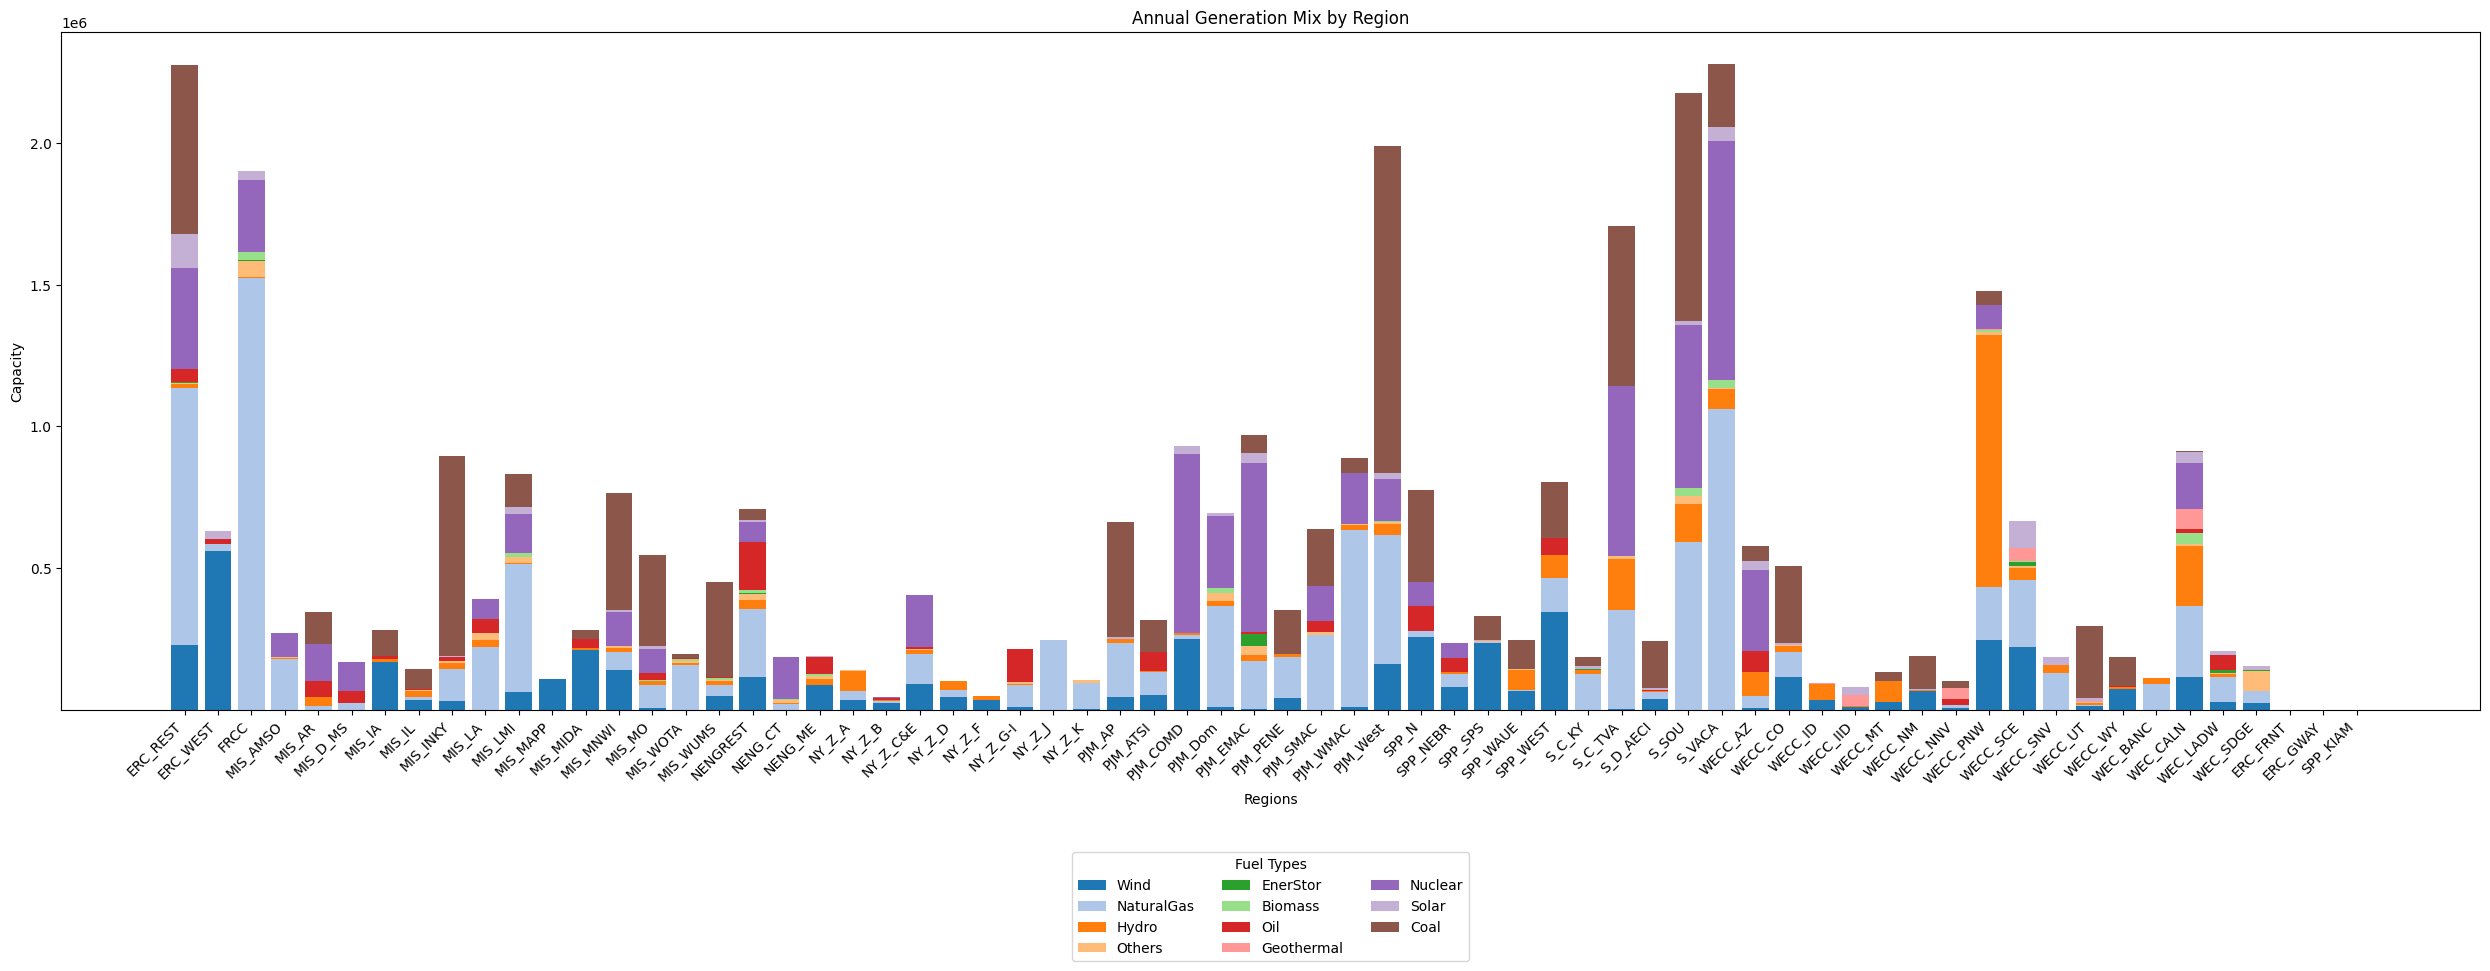

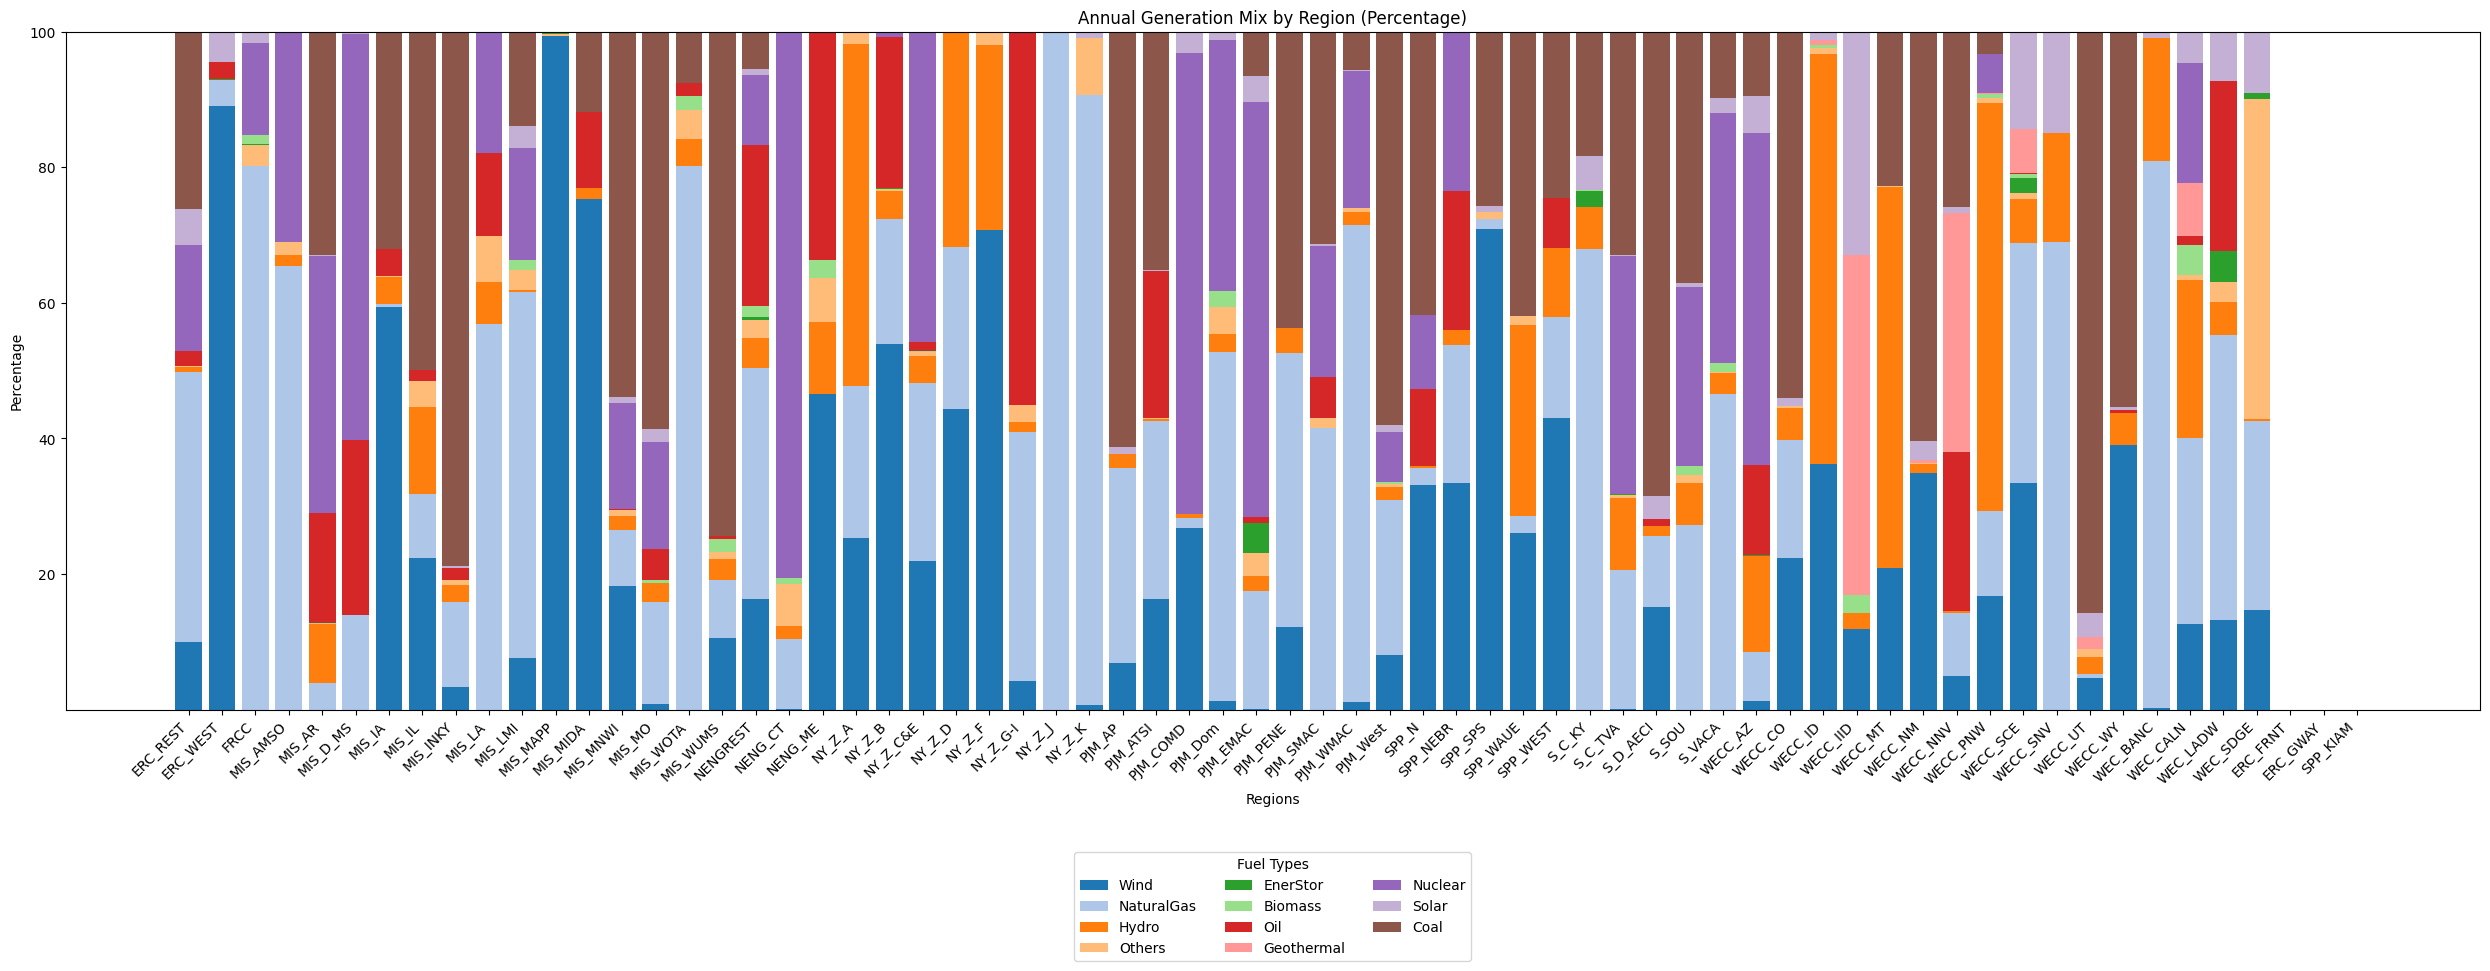

In [8]:
mix_by_region = analysis.get_annual_gen_mix_by_region()
analysis.plot_stacked_bar_chart(mix_by_region, percentage=False)
analysis.plot_stacked_bar_chart(mix_by_region, percentage=True)

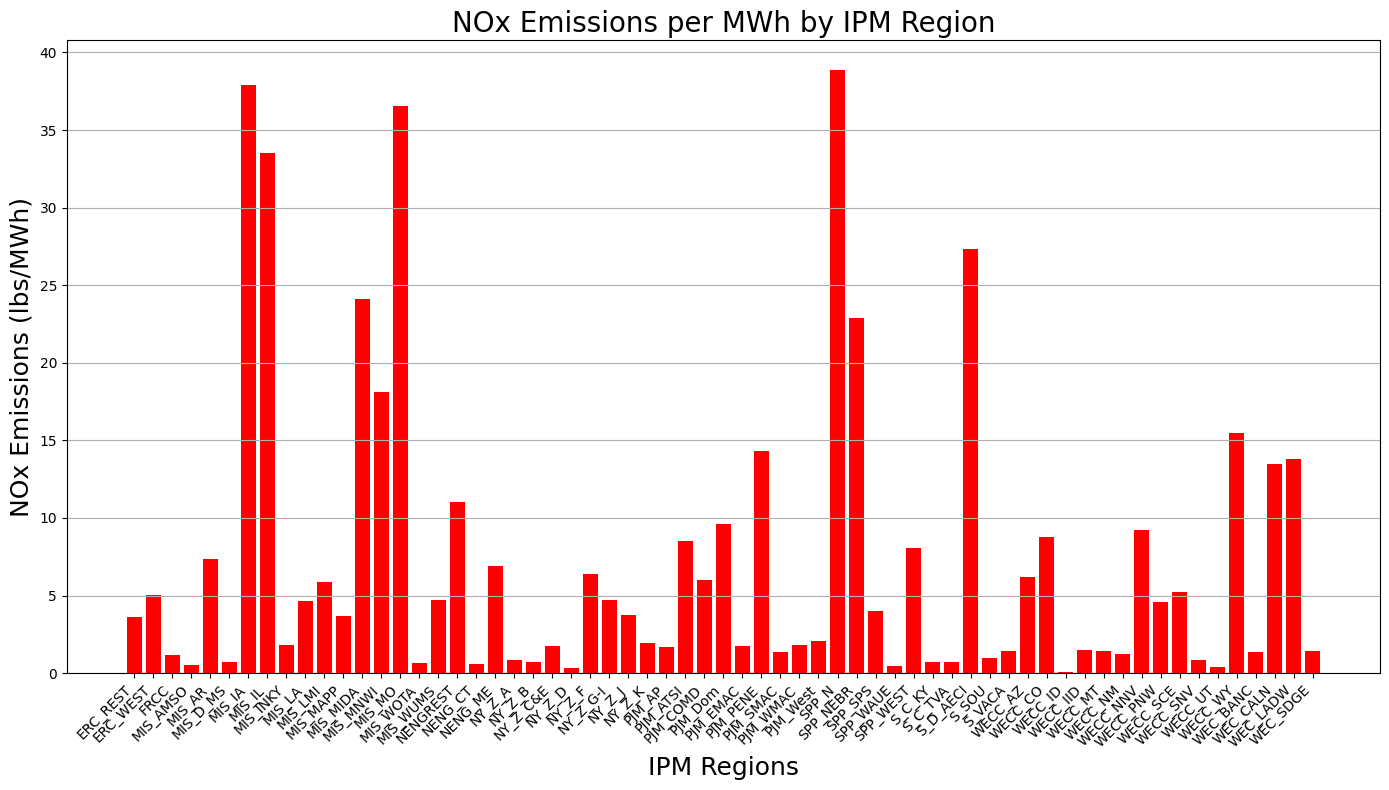

In [10]:
emission_capacity.plot_emissions()